# 금융 데이터 분석 (2)
## 이동평균선 (Moving Average)
이동평균선(Moving Average, MA)은 특정 기간 동안의 주가(또는 다른 데이터)의 평균값을 계산하여 선으로 이은 지표입니다. 주가의 전반적인 추세를 파악하고, 단기적인 변동성으로 인한 '노이즈'를 제거하여 시장의 큰 흐름을 분석하는 데 널리 사용됩니다.

예를 들어, 5일 이동평균선은 최근 5일간의 종가를 모두 더한 뒤 5로 나눈 값들을 연결한 선입니다. 이 선은 매일 새로운 거래일의 종가가 포함되면서 하루씩 이동하기 때문에 '이동평균'이라고 불립니다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

In [2]:
apple = fdr.DataReader("AAPL")
apple

,Open,High,Low,Close,Volume,Adj Close
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,0.098597
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,0.093453
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,0.086594
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,0.088737
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,0.091310
...,...,...,...,...,...,...
2025-06-23,201.630005,202.300003,198.960007,201.500000,55814300,201.500000
2025-06-24,202.589996,203.440002,200.199997,200.300003,54064000,200.300003
2025-06-25,201.449997,203.669998,200.619995,201.559998,39525700,201.559998
2025-06-26,201.429993,202.639999,199.460007,201.000000,50799100,201.000000


In [3]:
# 200일 단순 이동평균(SMA) 계산
apple['SMA_200'] = apple['Close'].rolling(window=200).mean()
apple

,Open,High,Low,Close,Volume,Adj Close,SMA_200
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,0.098597,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,0.093453,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,0.086594,NaN
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,0.088737,NaN
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,0.091310,NaN
...,...,...,...,...,...,...,...
2025-06-23,201.630005,202.300003,198.960007,201.500000,55814300,201.500000,223.73855
2025-06-24,202.589996,203.440002,200.199997,200.300003,54064000,200.300003,223.63580
2025-06-25,201.449997,203.669998,200.619995,201.559998,39525700,201.559998,223.53170
2025-06-26,201.429993,202.639999,199.460007,201.000000,50799100,201.000000,223.43260


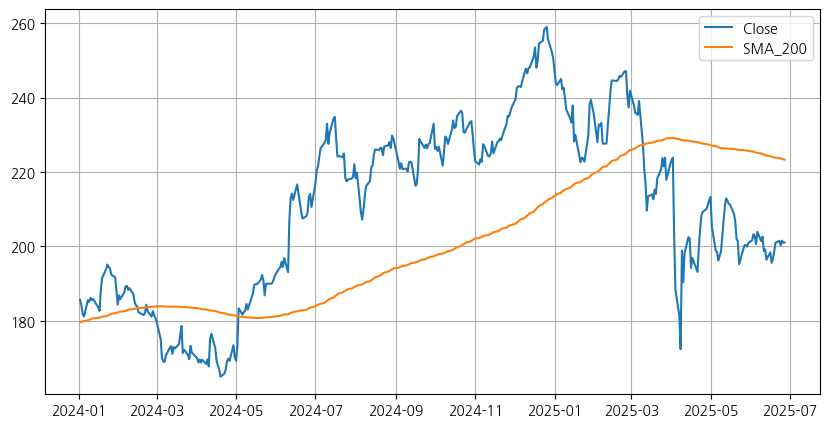

In [4]:
import koreanize_matplotlib

apple2025 = apple[apple.index.year >= 2024]

plt.figure(figsize = (10, 5))
plt.plot(apple2025['Close'])
plt.plot(apple2025['SMA_200'])
plt.legend(['Close', "SMA_200"])
plt.grid()
plt.show()

In [5]:
df = fdr.DataReader("AAPL")
df = df[df.index.year >= 2025]

# 단기 이동평균선 (5일)
df['MA5'] = df['Close'].rolling(window=5).mean()

# 중기 이동평균선 (20일)
df['MA20'] = df['Close'].rolling(window=20).mean()

df = df.dropna()
df

,Open,High,Low,Close,Volume,Adj Close,MA5,MA20
2025-01-31,247.190002,247.190002,233.440002,236.000000,101075100,235.432083,236.213998,234.587000
2025-02-03,229.990005,231.830002,225.699997,228.009995,73063300,227.461304,235.843997,233.794999
2025-02-04,227.250000,233.130005,226.649994,232.800003,45067300,232.239777,234.751999,233.266999
2025-02-05,228.529999,232.669998,228.270004,232.470001,39620300,231.910568,233.373999,232.640499
2025-02-06,231.289993,233.800003,230.429993,233.220001,29925300,232.658768,232.500000,232.190999
...,...,...,...,...,...,...,...,...
2025-06-23,201.630005,202.300003,198.960007,201.500000,55814300,201.500000,198.628000,200.036501
2025-06-24,202.589996,203.440002,200.199997,200.300003,54064000,200.300003,199.004001,200.288000
2025-06-25,201.449997,203.669998,200.619995,201.559998,39525700,201.559998,200.188000,200.355500
2025-06-26,201.429993,202.639999,199.460007,201.000000,50799100,201.000000,201.072000,200.384500


In [6]:
# 골든크로스 / 데드크로스 신호 생성
# 단기 이평선 > 장기 이평선 이면 1, 아니면 0
df['Signal'] = 0
df.loc[df['MA5'] > df['MA20'], 'Signal'] = 1
df

,Open,High,Low,Close,Volume,Adj Close,MA5,MA20,Signal
2025-01-31,247.190002,247.190002,233.440002,236.000000,101075100,235.432083,236.213998,234.587000,1
2025-02-03,229.990005,231.830002,225.699997,228.009995,73063300,227.461304,235.843997,233.794999,1
2025-02-04,227.250000,233.130005,226.649994,232.800003,45067300,232.239777,234.751999,233.266999,1
2025-02-05,228.529999,232.669998,228.270004,232.470001,39620300,231.910568,233.373999,232.640499,1
2025-02-06,231.289993,233.800003,230.429993,233.220001,29925300,232.658768,232.500000,232.190999,1
...,...,...,...,...,...,...,...,...,...
2025-06-23,201.630005,202.300003,198.960007,201.500000,55814300,201.500000,198.628000,200.036501,0
2025-06-24,202.589996,203.440002,200.199997,200.300003,54064000,200.300003,199.004001,200.288000,0
2025-06-25,201.449997,203.669998,200.619995,201.559998,39525700,201.559998,200.188000,200.355500,0
2025-06-26,201.429993,202.639999,199.460007,201.000000,50799100,201.000000,201.072000,200.384500,1


In [7]:
# 교차 지점 찾기: Signal의 전일과 당일 값이 다를 때
# 전일 대비 Signal이 1 증가하면 골든크로스(매수), 1 감소하면 데드크로스(매도)
df['Position'] = df['Signal'].diff()
df

,Open,High,Low,Close,Volume,Adj Close,MA5,MA20,Signal,Position
2025-01-31,247.190002,247.190002,233.440002,236.000000,101075100,235.432083,236.213998,234.587000,1,NaN
2025-02-03,229.990005,231.830002,225.699997,228.009995,73063300,227.461304,235.843997,233.794999,1,0.0
2025-02-04,227.250000,233.130005,226.649994,232.800003,45067300,232.239777,234.751999,233.266999,1,0.0
2025-02-05,228.529999,232.669998,228.270004,232.470001,39620300,231.910568,233.373999,232.640499,1,0.0
2025-02-06,231.289993,233.800003,230.429993,233.220001,29925300,232.658768,232.500000,232.190999,1,0.0
...,...,...,...,...,...,...,...,...,...,...
2025-06-23,201.630005,202.300003,198.960007,201.500000,55814300,201.500000,198.628000,200.036501,0,0.0
2025-06-24,202.589996,203.440002,200.199997,200.300003,54064000,200.300003,199.004001,200.288000,0,0.0
2025-06-25,201.449997,203.669998,200.619995,201.559998,39525700,201.559998,200.188000,200.355500,0,0.0
2025-06-26,201.429993,202.639999,199.460007,201.000000,50799100,201.000000,201.072000,200.384500,1,1.0


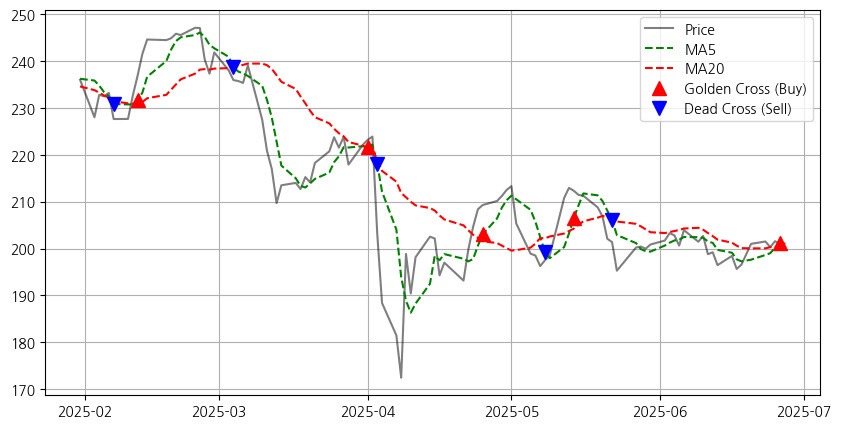

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label='Price', color='black', alpha=0.5)
plt.plot(df.index, df['MA5'], label='MA5', color='green', linestyle='--')
plt.plot(df.index, df['MA20'], label='MA20', color='red', linestyle='--')

# 골든크로스 지점 표시
plt.plot(df[df['Position'] == 1].index,
         df['MA5'][df['Position'] == 1],
         '^', markersize=10, color='r', label='Golden Cross (Buy)')

# 데드크로스 지점 표시
plt.plot(df[df['Position'] == -1].index,
         df['MA5'][df['Position'] == -1],
         'v', markersize=10, color='b', label='Dead Cross (Sell)')

plt.legend()
plt.grid(True)
plt.show()

### 백테스팅
특정 투자 전략이나 모델이 과거의 시장 데이터에서 어떤 성과를 보였을지 시뮬레이션하여 그 효율성을 평가하는 과정을 말합니다. 즉, "내가 만든 투자 규칙을 과거에 적용했다면 과연 돈을 벌 수 있었을까?"라는 질문에 대한 답을 찾아가는 과정이라고 할 수 있습니다.

주로 주식, 암호화폐, 외환 등 금융 시장에서 새로운 투자 전략을 실제 자본을 투입하기 전에 검증하기 위한 목적으로 널리 사용됩니다.

In [9]:
# !pip install backtesting
import warnings
warnings.filterwarnings("ignore")

from backtesting import Backtest, Strategy
from backtesting.lib import crossover

Loading BokehJS ...

In [10]:
class MaCrossStrategy(Strategy):
    # 전략에 사용할 변수 설정
    n1 = 5  # 단기 이동평균선 기간
    n2 = 20 # 장기 이동평균선 기간

    def init(self):
        # 전략 초기화 시 실행되는 부분
        # 종가 데이터를 사용하여 이동평균선 계산
        self.ma1 = self.I(pd.Series(self.data.Close).rolling(self.n1).mean)
        self.ma2 = self.I(pd.Series(self.data.Close).rolling(self.n2).mean)

    def next(self):
        # 데이터 포인트를 하나씩 순회하며 실행되는 부분 (매매 로직)
        # 골든크로스 발생 시 (보유 포지션 없으면) 매수
        if crossover(self.ma1, self.ma2):
            if not self.position:
                self.buy()
        # 데드크로스 발생 시 (보유 포지션 있으면) 매도
        elif crossover(self.ma2, self.ma1):
            if self.position:
                self.position.close()

In [11]:
df = fdr.DataReader("AAPL")
df

,Open,High,Low,Close,Volume,Adj Close
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,0.098597
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,0.093453
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,0.086594
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,0.088737
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,0.091310
...,...,...,...,...,...,...
2025-06-23,201.630005,202.300003,198.960007,201.500000,55814300,201.500000
2025-06-24,202.589996,203.440002,200.199997,200.300003,54064000,200.300003
2025-06-25,201.449997,203.669998,200.619995,201.559998,39525700,201.559998
2025-06-26,201.429993,202.639999,199.460007,201.000000,50799100,201.000000


In [12]:
# 초기 자본금 10,000 달러, 수수료 0.2%로 설정
bt = Backtest(df, MaCrossStrategy, cash=10000, commission=.002,
              exclusive_orders=True)

In [13]:
# Return: 이 전략을 사용했을 때의 누적 수익률입니다. 초기 자본 $10,000이 약 $994,000로 불어났다는 의미로, 숫자 자체는 매우 커 보입니다.
# Buy & Hold Return [%]: 142,268.4%, 같은 기간 동안 AAPL 주식을 그냥 처음 사서 한 번도 팔지 않고 보유만 했을 때의 수익률입니다.
# Return (Ann.) [%] (연평균 수익률): 10.88%, 연평균으로 환산하면 약 10.9%의 수익을 냈습니다. 나쁘지 않아 보일 수 있지만, AAPL이라는 엄청난 성장주의 수익률을 대부분 놓친 결과입니다.
# Max. Drawdown [%] (최대 자산 하락률): -67.8%, 투자 기간 중 자산이 고점 대비 최대 -68%까지 하락했던 시기가 있었다는 의미입니다. 원금의 3분의 1만 남는 끔찍한 경험을 견뎌야 했습니다.
# Sharpe Ratio (샤프 지수): 0.32, 위험 대비 수익성을 나타내는 지표입니다. 보통 1 이상은 되어야 투자 매력이 있다고 평가하는데, 0.32는 감수한 위험에 비해 얻은 수익이 매우 보잘것없었다는 의미입니다.
# Win Rate [%] (승률): 38.1%
# Profit Factor (수익/손실 비율): 1.87, 승률이 낮음에도 불구하고 누적 수익이 난 이유는, 이길 때(총수익) 질 때(총손실)보다 1.87배 더 많이 벌었기 때문입니다. 즉, '짧게 여러 번 잃고, 한 번 길게 먹는' 전략이었지만, 그 결과가 '존버'에 비해 형편없었습니다.
# Trades (총 거래 횟수): 320, 44년이 넘는 기간 동안 총 320번의 매매가 발생했습니다. 이로 인해 많은 거래 비용(Commissions [$])이 발생하여 수익률을 깎아 먹었습니다.
# 결론: "AAPL과 같이 장기적으로 강력하게 우상향하는 주식에는 단순한 단기 이동평균선 교차 전략이 독이 된다."

stats = bt.run()
stats

Backtest.run:   0%|          | 0/11206 [00:00<?, ?bar/s]

Start                     1980-12-12 00:00:00
End                       2025-06-27 00:00:00
Duration                  16268 days 00:00:00
Exposure Time [%]                    59.41564
Equity Final [$]                   988257.902
Equity Peak [$]                 1434393.14578
Commissions [$]                  219736.42048
Return [%]                         9782.57902
Buy & Hold Return [%]            142325.07699
Return (Ann.) [%]                    10.86147
Volatility (Ann.) [%]                33.61041
CAGR [%]                              7.37461
Sharpe Ratio                          0.32316
Sortino Ratio                          0.5506
Calmar Ratio                          0.16011
Alpha [%]                        -52040.27199
Beta                                  0.43438
Max. Drawdown [%]                   -67.83695
Avg. Drawdown [%]                    -7.09958
Max. Drawdown Duration     2739 days 00:00:00
Avg. Drawdown Duration       96 days 00:00:00
# Trades                          

In [14]:
import warnings
warnings.filterwarnings("ignore")

bt.plot()
plt.show()

## 가중 이동평균선(WMA)
가중 이동평균선(Weighted Moving Average, WMA)은 이동평균선의 한 종류로, 최신 데이터에 선형적으로 더 높은 가중치를 부여하여 평균을 계산하는 기술적 분석 지표입니다.

단순 이동평균(SMA)이 특정 기간 내 모든 데이터에 동일한 가중치를 주는 것과 달리, 가중 이동평균은 최근일수록 더 높은 중요도를 부여합니다. 이로 인해 단순 이동평균보다 가격 변동에 더 민감하게 반응하며, 추세의 전환을 비교적 빠르게 포착할 수 있습니다.

In [15]:
data = {'Close': [10000, 10200, 10100, 10300, 10500, 10400, 10600, 10800, 11000, 10700,
                 10900, 11200, 11300, 11100, 11500, 11700, 11600, 11800, 12000, 11900]}

df = pd.DataFrame(data)

In [16]:
import numpy as np

# WMA를 계산할 기간(window) 설정
window_size = 10

# 가중치 생성
weights = np.arange(1, window_size + 1)
weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [17]:
df['WMA_10'] = df['Close'].rolling(window_size).apply(lambda p: np.dot(p, weights) / weights.sum())
df.dropna()

,Close,WMA_10
9,10700,10607.272727
10,10900,10687.272727
11,11200,10805.454545
12,11300,10923.636364
13,11100,10983.636364
14,11500,11101.818182
15,11700,11238.181818
16,11600,11332.727273
17,11800,11445.454545
18,12000,11576.363636


## 지수 이동평균선(EMA)이란?
지수 이동평균선(Exponential Moving Average, EMA)은 이동평균선의 한 종류로, 최신 데이터에 더 높은 가중치를 부여하여 평균을 계산하는 기술적 분석 지표입니다.

단순 이동평균선(SMA)이 특정 기간 내의 모든 데이터에 동일한 가중치를 부여하는 반면, 지수 이동평균선은 '지수적으로' 감소하는 가중치를 적용하여 최근의 가격 변동에 더 민감하게 반응하도록 설계되었습니다. 이로 인해 주가의 방향 전환이나 추세 변화를 단순 이동평균선보다 빠르게 포착하는 장점이 있습니다.

In [18]:
data = {'Close': [100, 102, 108, 104, 111]}
df = pd.DataFrame(data)
df

,Close
0,100
1,102
2,108
3,104
4,111


In [19]:
df['EMA_5'] = df['Close'].ewm(span=3, adjust=False).mean()
df

,Close,EMA_5
0,100,100.000
1,102,101.000
2,108,104.500
3,104,104.250
4,111,107.625


In [20]:
df['EMA_5'] = df['Close'].ewm(alpha = 0.5, adjust=False).mean()
df

,Close,EMA_5
0,100,100.000
1,102,101.000
2,108,104.500
3,104,104.250
4,111,107.625


## 연습문제
1. 삼성전자(005930)의 2023년 이후 데이터를 사용하여 10일, 60일 단순 이동평균선(SMA)을 계산하고, 종가와 함께 시각화하세요.

2. 현대차(005380)의 2023년 이후 데이터를 사용하여, 5일 단순 이동평균선(SMA)과 5일 지수 이동평균선(EMA)을 계산하세요. 두 이동평균선을 종가와 함께 시각화하고, 비교해보세요.

3. SK하이닉스(000660)의 2023년 이후 데이터에 대해 20일(단기), 60일(중기) 이동평균선을 기준으로 골든크로스와 데드크로스가 발생한 지점을 찾아내고, 차트에 화살표로 표시해보세요. (강의 자료의 Position 열 생성 및 시각화 코드 참고)

4. 강의 자료의 MaCrossStrategy를 참고하여, 10일(단기)과 50일(장기) 지수 이동평균선 교차 전략을 사용하는 MyMaStrategy 클래스를 직접 만들어 보세요.
    * 단기 이평선 기간 n1 = 10
    * 장기 이평선 기간 n2 = 50

5. LG에너지솔루션(373220)의 전체 상장 데이터를 대상으로, 문제 4에서 만든 MyMaStrategy(10-50일 교차 전략)를 사용하여 백테스팅을 실행하고 결과를 출력하세요. Return [%]와 Buy & Hold Return [%]을 비교하여 전략의 유효성을 간략히 평가해보세요.